In [1]:
import torch

print(f"Is the GPU available? {torch.cuda.is_available()}")
print(f"Device count: {torch.cuda.device_count()}")
used_device = torch.cuda.current_device()
print(f"Used device: {used_device}")
print(f"Used device name: {torch.cuda.get_device_name(used_device)}")

Is the GPU available? True
Device count: 2
Used device: 0
Used device name: AMD Radeon RX 6700 XT


In [2]:
!yolo checks

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.2+rocm5.6 CUDA:0 (AMD Radeon RX 6700 XT, 12272MiB)
Setup complete ✅ (12 CPUs, 30.5 GB RAM, 81.6/95.6 GB disk)

OS                  Linux-6.5.0-14-generic-x86_64-with-glibc2.35
Environment         Linux
Python              3.10.12
Install             git
RAM                 30.49 GB
CPU                 AMD Ryzen 5 7600 6-Core Processor
CUDA                None

matplotlib          ✅ 3.8.2>=3.3.0
numpy               ✅ 1.22.4>=1.22.2
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 10.2.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.2+rocm5.6>=1.8.0
torchvision         ✅ 0.16.2+rocm5.6>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.7
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.1.4>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


In [3]:
api_key = "4uCryHY4NXqkn2x1ztFz"

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key=api_key)
project = rf.workspace("santanderlogos").project("logodetection-3u4zw")
dataset = project.version(7).download("yolov8")
# version 1: no data augmentation
# versin 2: data augmentation, train test valid
# version 3: data augmentation, only train test
# version 4: more data
# version 5: added Zewei data train test valid
# version 6: added 78 new images. train test valid
# version 7: added paypal, bizum, getnet and pagonxt

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.2, to fix: `pip install ultralytics==8.0.196`
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to LogoDetection-7 in yolov8:: 100%|██████████| 1664/1664 [00:00<00:00, 11876.85it/s]


In [5]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 patience=0

New https://pypi.org/project/ultralytics/8.1.5 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.2+rocm5.6 CUDA:0 (AMD Radeon RX 6700 XT, 12272MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/mentefria/Documents/YOLO_retraining/LogoDetection-7/data.yaml, epochs=100, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

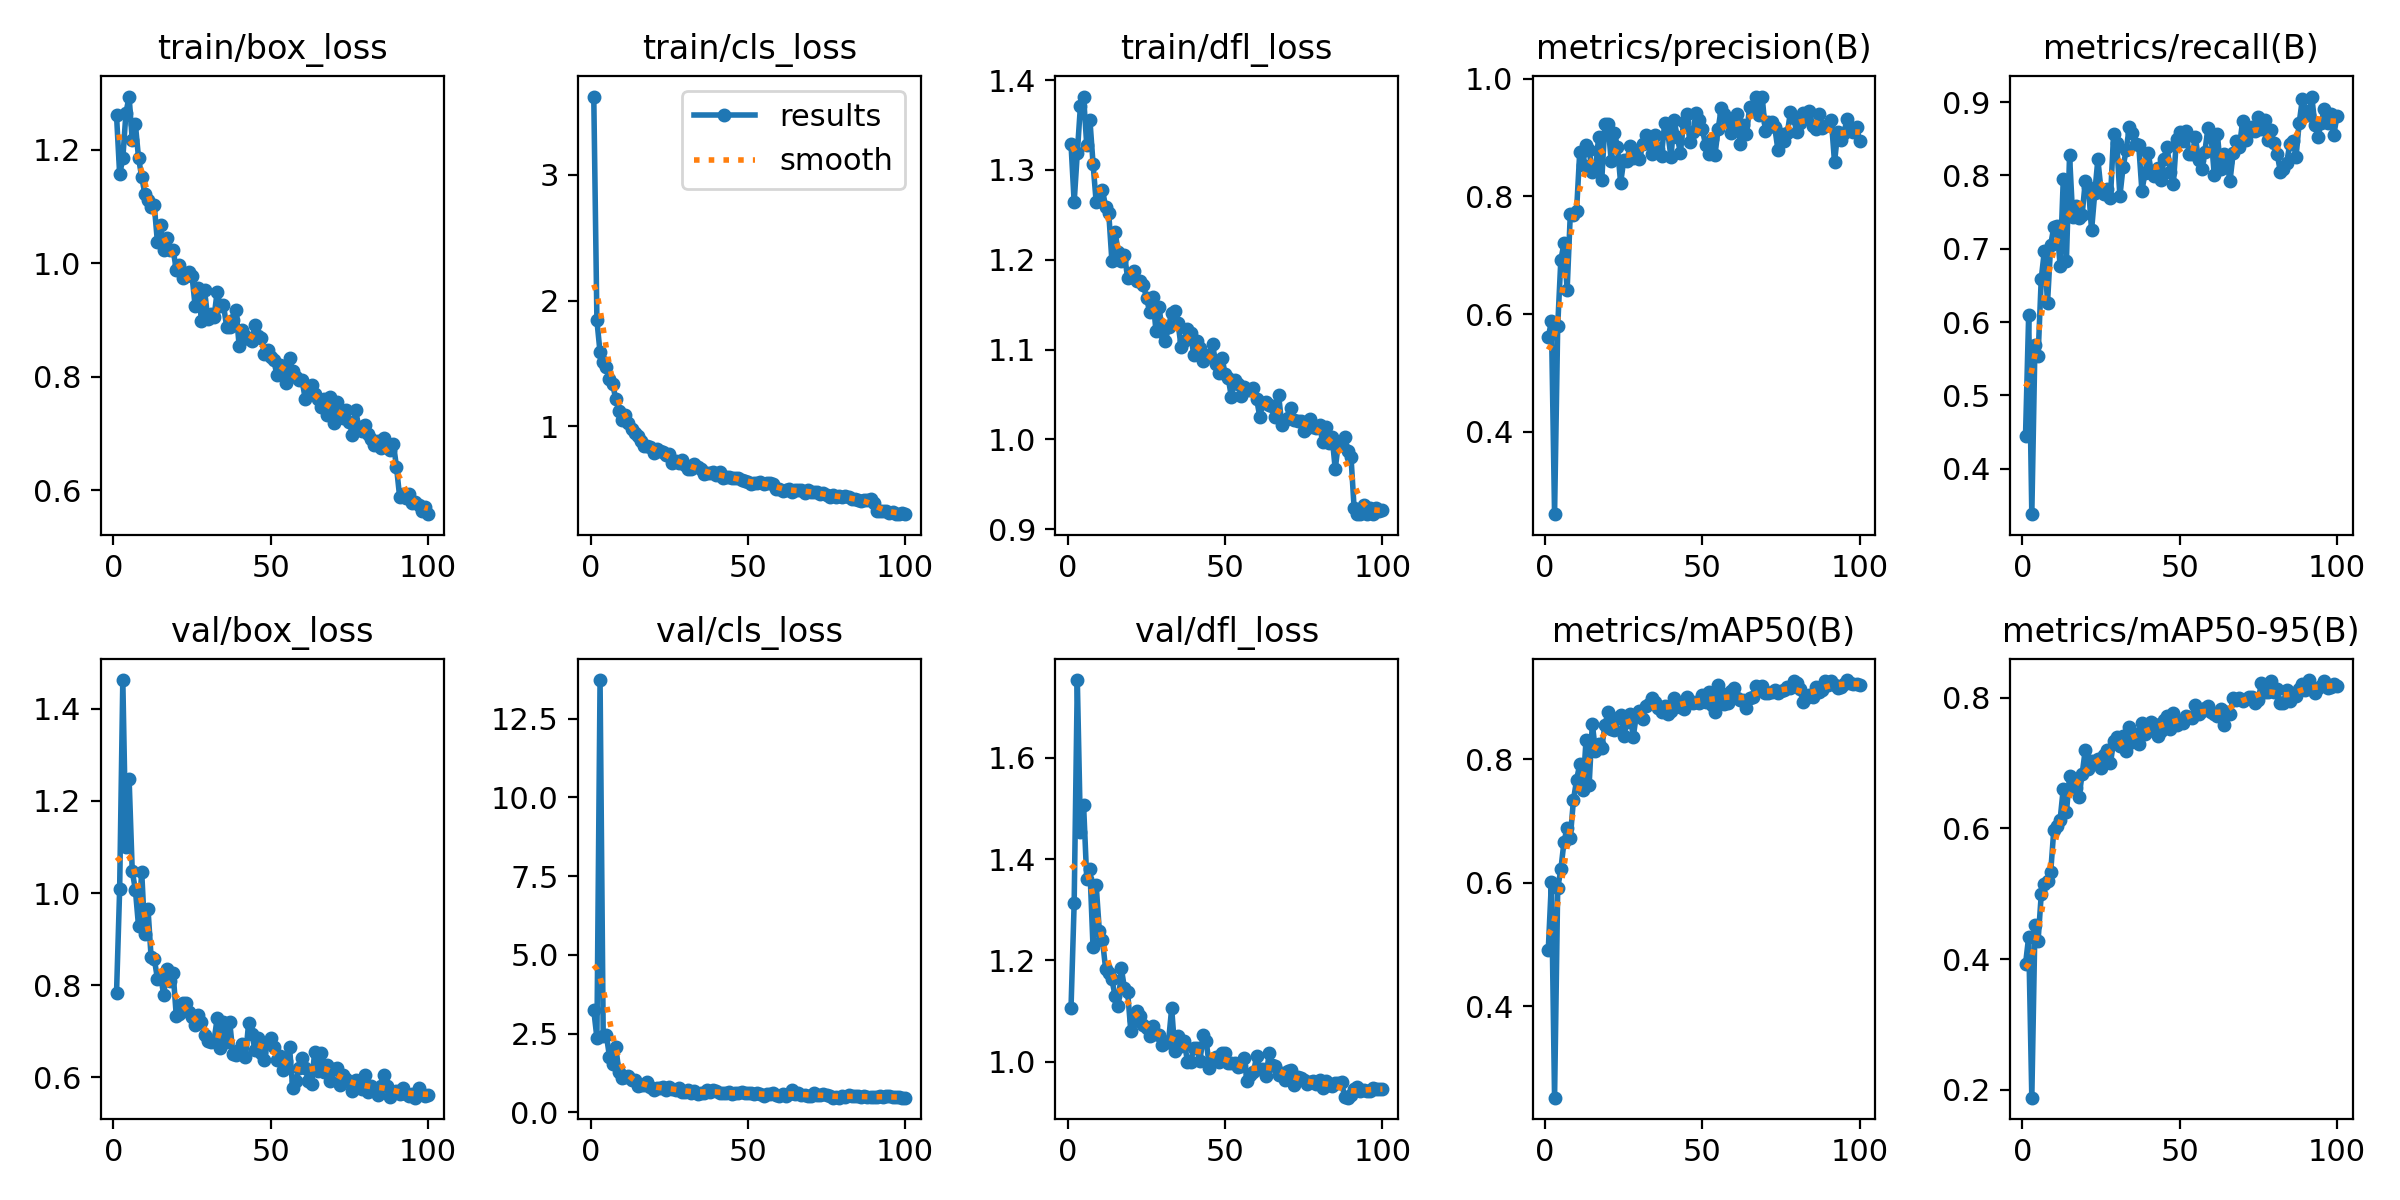

In [6]:
from IPython.display import Image
Image(filename='runs/detect/train15/results.png') 